<a href="https://colab.research.google.com/github/salirezaeb/FPGA_ANN784/blob/master/FINALPROJECTAlirezaebrahimian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import json

In [ ]:
import numpy as np

In [ ]:
pip install pydot graphviz

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
from tensorflow.keras.optimizers import SGD

DATASET MNIST

In [ ]:
mnist=tf.keras.datasets.mnist
(X_train, Y_train) , (X_test, Y_test)=mnist.load_data()
X_train, X_test=X_train/255.0, X_test/255.0

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
lossfn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Compile

architecture


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 16330 (63.79 KB)
Trainable params: 16330 (63.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


TRAIN MODEL

In [ ]:
model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3761 - accuracy: 0.8889
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2045 - accuracy: 0.9401
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1692 - accuracy: 0.9496
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1517 - accuracy: 0.9547
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1365 - accuracy: 0.9591
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1294 - accuracy: 0.9613
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1223 - accuracy: 0.9628
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1156 - accuracy: 0.9647
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1093 - accuracy: 0.9666
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.106

**weights**


In [ ]:
import json
import struct

weightList = []
biasList = []

for layer in model.layers:
    weights = layer.get_weights()
    if weights:  # Check if the layer has weights
        layer_weights = weights[0].T  # Transpose the weights
        # Convert weights to 32-bit hex
        hex_weights = [format(struct.unpack('!I', struct.pack('!f', w))[0], '08x') for w in layer_weights.flatten()]
        weightList.append(hex_weights)

        if len(weights) > 1:
            # Convert biases to 32-bit hex
            layer_biases = [format(struct.unpack('!I', struct.pack('!f', b))[0], '08x') for b in weights[1]]
            biasList.append(layer_biases)

data = {"weights": weightList, "biases": biasList}

with open('weightsandbiases.txt', 'w') as f:
    json.dump(data, f, indent=4)


evaluate

In [ ]:
model.evaluate(X_test, Y_test, verbose=2)

313/313 - 0s - loss: 0.1633 - accuracy: 0.9547 - 475ms/epoch - 2ms/step


[0.16329945623874664, 0.9546999931335449]

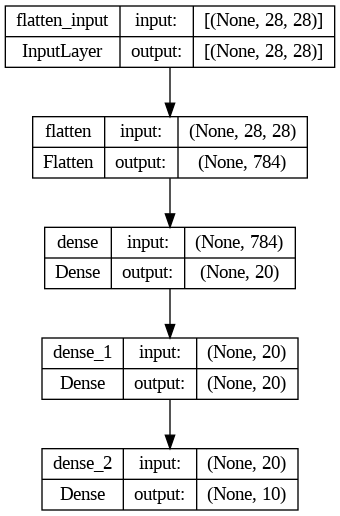

In [ ]:
plot_model(model, to_file='model_diagram.png',show_shapes=True, show_layer_names=True)

# New Section

In [ ]:
import os
import json

# Define parameters
inputFile = "weightsandbiases.txt"
outputPath = "./content/binary/"

# Ensure the output directory exists
if not os.path.exists(outputPath):
    os.makedirs(outputPath)
    print(f"Output directory created at {outputPath}")

def writeHexToFiles(inputFile):
    # Load the data from the input file
    with open(inputFile, "r") as file:
        data = json.load(file)

    # Process and write weights for each layer
    for layer_index, layer_weights in enumerate(data['weights'], start=1):
        filename = f"w_layer{layer_index}.txt"
        with open(os.path.join(outputPath, filename), 'w') as f:
            for neuron_weights in layer_weights:
                # Join all weights for a neuron into a single line
                weights_line = ' '.join(neuron_weights)
                f.write(f"{weights_line}\n")
        print(f"Weights for Layer {layer_index} written to {filename}")

    # Process and write biases for each layer
    for layer_index, layer_biases in enumerate(data['biases'], start=1):
        filename = f"b_layer{layer_index}.txt"
        with open(os.path.join(outputPath, filename), 'w') as f:
            # Since each neuron has a single bias, each bias is its own line
            for bias in layer_biases:
                f.write(f"{bias}\n")
        print(f"Biases for Layer {layer_index} written to {filename}")

if __name__ == "__main__":
    writeHexToFiles(inputFile)
